In [ ]:
This notebook contains no simulations. This is all code written to illustrate the complex paths on which forward EU

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

In [3]:
weights_lib = { 
                'Euler 1-step 1-order' : [1],
                'Euler 2-step 2-order' : [0.5 +0.5*1j, 0.5-0.5*1j],
                'Euler 2-step 3-order' : [1+1j*np.sqrt(2)/2,-1j*np.sqrt(2)/2],
                'Euler 2-step 3-order exp' : [0.838852+1j*0.604004, 0.161148-1j*0.604004],
                'Euler 2-step symplectic' : [0.5 +0.5*np.sqrt(3)*1j, 0.5-0.5*np.sqrt(3)*1j],
                'Euler 3-step 1-order' : [8.29344624e-01 , 5.95442650e-02, 1-8.29344624e-01-5.95442650e-02],
                'Euler 3-step 3-order' : [0.1867308533646 + 0.480773884550331*1j, 0.626538293270800, 0.1867308533646 - 0.480773884550331*1j],
                'Euler 3-step 2-order' : [0.411741936185254 + 0.430244574248458*1j, 0.176516127629493, 0.411741936185254-0.430244574248458*1j],
                'Euler 4-step 4-order' : [   0.04262665650273905+0.394632953172082*1j,
                                           0.4573733434973006-0.23510048799854047j, 0.4573733434973006+0.23510048799854047j, 0.04262665650273905-0.394632953172082*1j],
                'Euler 4-step 5-order' :[0.468161714486717 - 0.26941588085837*1j, 0.160647423722113 + 0.351192187389791*1j,0.335788810038662 + 0.241712151385474*1j, 
                                         0.0354020517525083 - 0.323488457916895*1j],
                'Midpo 2-step 4-order' :[0.5 + 0.28867513459*1j, 0.5-0.28867513459*1j]}

def pathwise(x, path):
    stepsize = x[1:]-x[:-1]
    contour = [x[0]]
    for i in range(len(x)-1):
        weights = np.cumsum(weights_lib[path])
        substeps = [x[i]+stepsize[i]*weight for weight in weights]
        contour +=substeps
    return np.array(contour)

In [3]:
w1 = np.array(weights_lib['Euler 2-step 2-order'])
w = np.r_[0,np.cumsum(w1)]

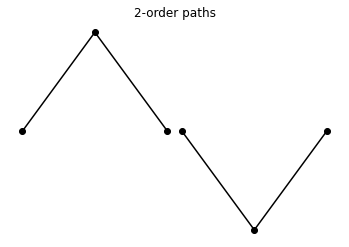

In [4]:
l = list(permutations(w1))
i = 0
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    plt.plot(w.real + 1.1*i, w.imag, 'k-o')
    plt.title('2-order paths')
    plt.axis('off')
    i+=1

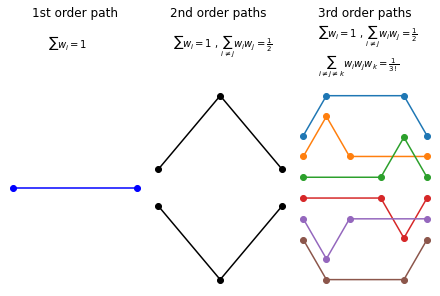

In [5]:
mosaic1 = """
    DEF
    DEF
    ABC
    ABC
    ABC
    ABC
    ABC
    ABC
    ABC
    ABC
    """
ax_dict = plt.figure(constrained_layout=True).subplot_mosaic(mosaic1)
w1 = np.array(weights_lib['Euler 2-step 2-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))
i = 0
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"

ax_dict['D'].text(.3,.5,r'$\sum_{} w_i = 1$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
ax_dict['E'].text(.15,.5,r'$\sum_{} w_i = 1$'+' , '+ r'$\sum_{i \neq j} w_iw_j = \frac{1}{2}$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
#ax_dict['E'].text(.3,.7,r'$\sum_{} w_i = 1$',\
#          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
ax_dict['F'].text(.15,.7,r'$\sum_{} w_i = 1$' +' , '+ r'$\sum_{i \neq j} w_iw_j = \frac{1}{2}$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})

ax_dict['F'].text(.15,.1,r'$\sum_{i \neq j \neq k} w_iw_jw_k = \frac{1}{3 !}$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
ax_dict['D'].axis('off')
ax_dict['E'].axis('off')
ax_dict['F'].axis('off')

ax_dict['A'].plot([0,1], [0, 0], 'b-o')
ax_dict['D'].set_title('1st order path')
ax_dict['A'].axis('off')
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    ax_dict['B'].plot(w.real, w.imag - .25*i, 'k-o')
    ax_dict['E'].set_title('2nd order paths ')
    ax_dict['B'].axis('off')
    i+=1
w1 = np.array(weights_lib['Euler 3-step 3-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))
i = 0
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    ax_dict['C'].plot(w.real, w.imag - .25*i, '-o')
    ax_dict['F'].set_title('3rd order paths')
    ax_dict['C'].axis('off')
    i+=1
plt.savefig('3_1.pdf')

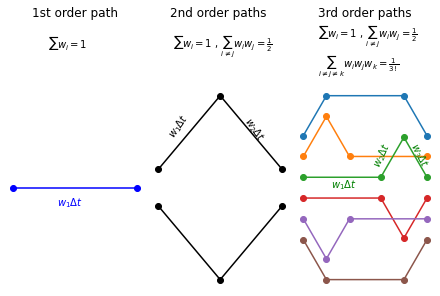

In [13]:
mosaic1 = """
    DEF
    DEF
    ABC
    ABC
    ABC
    ABC
    ABC
    ABC
    ABC
    ABC
    """
ax_dict = plt.figure(constrained_layout=True).subplot_mosaic(mosaic1)
w1 = np.array(weights_lib['Euler 2-step 2-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))
i = 0
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"

ax_dict['D'].text(.3,.5,r'$\sum_{} w_i = 1$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
ax_dict['E'].text(.15,.5,r'$\sum_{} w_i = 1$'+' , '+ r'$\sum_{i \neq j} w_iw_j = \frac{1}{2}$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
#ax_dict['E'].text(.3,.7,r'$\sum_{} w_i = 1$',\
#          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
ax_dict['F'].text(.15,.7,r'$\sum_{} w_i = 1$' +' , '+ r'$\sum_{i \neq j} w_iw_j = \frac{1}{2}$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})

ax_dict['F'].text(.15,.1,r'$\sum_{i \neq j \neq k} w_iw_jw_k = \frac{1}{3 !}$',\
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
ax_dict['D'].axis('off')
ax_dict['E'].axis('off')
ax_dict['F'].axis('off')

ax_dict['A'].plot([0,1], [0, 0], 'b-o')
ax_dict['A'].text(.35,-0.01,r'$w_1 \Delta t$', c = 'b',\
          bbox={'facecolor':'white','alpha':0.01,'edgecolor':'none','pad':1})
ax_dict['D'].set_title('1st order path')
ax_dict['A'].axis('off')
color_list1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_list = ['#d62728','#1f77b4', '#2ca02c',  '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    ax_dict['B'].plot(w.real, w.imag - .25*i, 'k-o')
    ax_dict['E'].set_title('2nd order paths ')
    ax_dict['B'].axis('off')
    i+=1
w1 = np.array(weights_lib['Euler 3-step 3-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))
i = 0
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    if i == 10:
        ax_dict['C'].plot(w.real, w.imag - .25*i, 'r-o')
    elif i == 12:
        ax_dict['C'].plot(w.real, w.imag - .25*i, 'g-o')
    else:
        ax_dict['C'].plot(w.real, w.imag - .25*i, '-o', color = color_list1[i])
        
    ax_dict['F'].set_title('3rd order paths')
    ax_dict['C'].axis('off')
    i+=1

    
ax_dict['B'].text(.06,0.22,r'$w_1 \Delta t$', c = 'k', rotation = 55,\
      bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1})
ax_dict['B'].text(.67,0.2,r'$w_2 \Delta t$', c = 'k', rotation = -55,\
      bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1})
ax_dict['C'].text(.22,-0.63,r'$w_1 \Delta t$', c = 'g', rotation =0,\
      bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1})
ax_dict['C'].text(.545,-0.36,r'$w_2 \Delta t$', c = 'g', alpha =1, rotation =65,\
      bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1})
ax_dict['C'].text(.84,-0.36,r'$w_3 \Delta t$', c = 'g', alpha =1, rotation =-63,\
      bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1})

plt.savefig('3_1_v31.pdf')

In [9]:
import sympy as sp
w_1, w_2, w_3, w_4, w_5, dt = sp.symbols('w_1, w_2, w_3,w_4, w_5, dt')

In [8]:
expr = (1+w_1*dt)*(1+w_2*dt)*(1+w_3*dt)
expr.expand()

dt**3*w_1*w_2*w_3 + dt**2*w_1*w_2 + dt**2*w_1*w_3 + dt**2*w_2*w_3 + dt*w_1 + dt*w_2 + dt*w_3 + 1

In [9]:
expr = (1+w_1*dt)*(1+w_2*dt)
expr.expand()

dt**2*w_1*w_2 + dt*w_1 + dt*w_2 + 1

In [10]:
expr = (1+w_1*dt)*(1+w_2*dt)*(1+w_3*dt)*(1+w_4*dt)
expr.expand()

dt**4*w_1*w_2*w_3*w_4 + dt**3*w_1*w_2*w_3 + dt**3*w_1*w_2*w_4 + dt**3*w_1*w_3*w_4 + dt**3*w_2*w_3*w_4 + dt**2*w_1*w_2 + dt**2*w_1*w_3 + dt**2*w_1*w_4 + dt**2*w_2*w_3 + dt**2*w_2*w_4 + dt**2*w_3*w_4 + dt*w_1 + dt*w_2 + dt*w_3 + dt*w_4 + 1

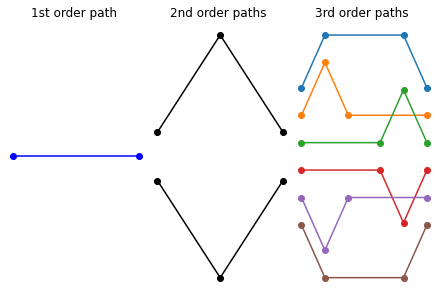

In [7]:
mosaic1 = """
    ABC
    """
ax_dict = plt.figure(constrained_layout=True).subplot_mosaic(mosaic1)
w1 = np.array(weights_lib['Euler 2-step 2-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))
i = 0

ax_dict['A'].plot([0,1], [0, 0], 'b-o')
ax_dict['A'].set_title('1st order path ')
ax_dict['A'].axis('off')
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    ax_dict['B'].plot(w.real, w.imag - .25*i, 'k-o')
    ax_dict['B'].set_title('2nd order paths ')
    ax_dict['B'].axis('off')
    i+=1
w1 = np.array(weights_lib['Euler 3-step 3-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))
i = 0
for w2 in l:
    w = np.r_[0,np.cumsum(w2)]
    ax_dict['C'].plot(w.real, w.imag - .25*i, '-o')
    ax_dict['C'].set_title('3rd order paths ')
    ax_dict['C'].axis('off')
    i+=1
plt.savefig('3_1_v2.pdf')

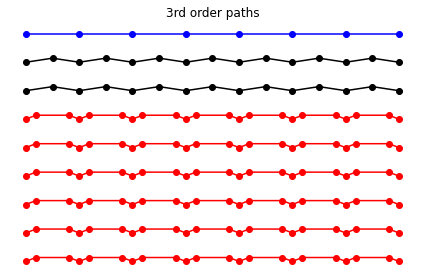

In [24]:
t = np.linspace(0,1, 8)
mosaic1 = """
    A
    """
ax_dict = plt.figure(tight_layout=True).subplot_mosaic(mosaic1)
path = pathwise(t, 'Euler 1-step 1-order')


ax_dict['A'].plot(path.real, path.imag, 'b-o')
ax_dict['A'].set_title('1st order path')
ax_dict['A'].axis('off')
i = 1
for r in [0,1]:
    path = pathwise(t, 'Euler 2-step 2-order')
    ax_dict['A'].plot(path.real, path.imag-.5*i, 'k-o')
    ax_dict['A'].set_title('2nd order paths ')
    ax_dict['A'].axis('off')
    i+=1
w1 = np.array(weights_lib['Euler 3-step 3-order'])
w = np.r_[0,np.cumsum(w1)]
l = list(permutations(w1))

for w2 in l:
    path = pathwise(t, 'Euler 3-step 3-order')
    ax_dict['A'].plot(path.real, path.imag-0.5*i, 'r-o')
    ax_dict['A'].set_title('3rd order paths')
    ax_dict['A'].axis('off')
    i+=1
plt.savefig('3_2.pdf')